In [1]:
%pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 48.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=0365a45b9c8b419018c8f4796cefaed3e42d3e1fbb4a98374eefbcccda85bcd4
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch 
import os

In [3]:
model = SentenceTransformer('clip-ViT-B-32')

In [4]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

--2023-03-27 01:41:08--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1922426838 (1.8G) [application/zip]
Saving to: ‘unsplash-25k-photos.zip’

unsplash-25k-photos 100%[===================>]   1.79G  28.4MB/s    in 65s     

2023-03-27 01:42:13 (28.3 MB/s) - ‘unsplash-25k-photos.zip’ saved [1922426838/1922426838]



In [5]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

Streaming output truncated to the last 5000 lines.
  inflating: photos/ErnD0oSB9OE.jpg  
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  

In [6]:
img_names = list(glob.glob('photos/*.jpg'))[:5000]
print(len(img_names))

5000


In [9]:
img_names[0:5]

['photos/DRPC3e4dm80.jpg',
 'photos/fA6PXjd41JI.jpg',
 'photos/algcokq4uZQ.jpg',
 'photos/qS4JTLOi6Mw.jpg',
 'photos/V8YzvXKLwDw.jpg']

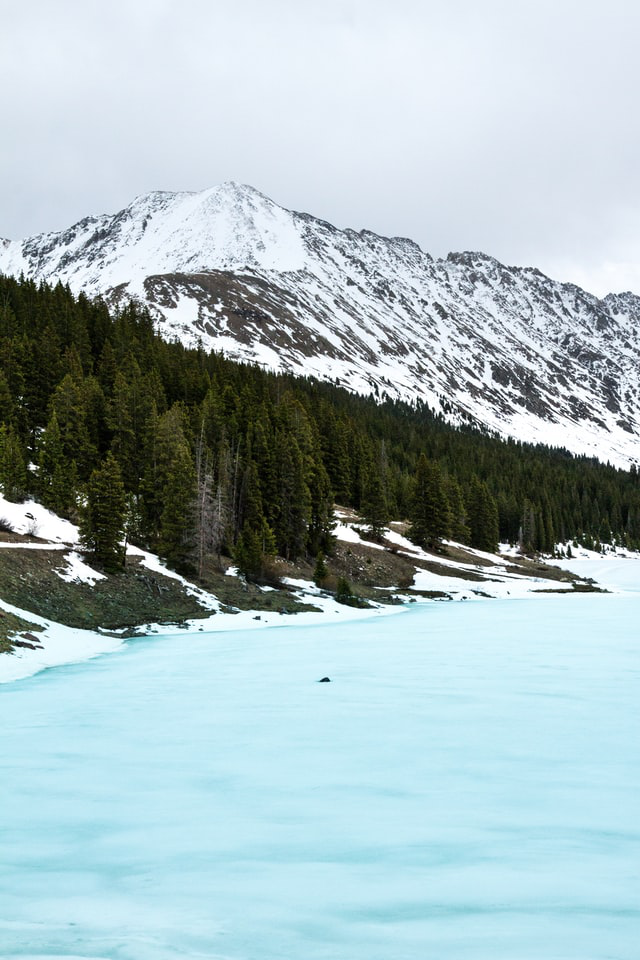

In [16]:
Image.open(img_names[0])


In [17]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [18]:
img_folder = '/photos'

def search(query, k=3):
  query_emd = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

  hits = util.semantic_search(query_emd, img_embed, top_k=k)[0]
  print(hits)

  print("Query: ", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

[{'corpus_id': 571, 'score': 0.2968071401119232}, {'corpus_id': 325, 'score': 0.28629058599472046}, {'corpus_id': 1699, 'score': 0.2851773202419281}]
Query:  man with dog
photos/yYdFmqK2UfY.jpg


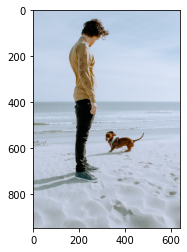

photos/Ld9jkKeeSJw.jpg


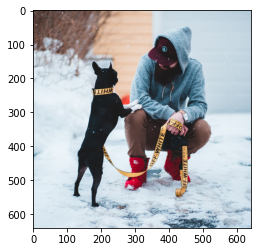

photos/tkn_izTEVGo.jpg


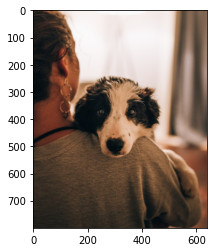

In [28]:
search('man with dog')

[{'corpus_id': 2037, 'score': 0.2937318980693817}, {'corpus_id': 2813, 'score': 0.2812073528766632}, {'corpus_id': 4052, 'score': 0.2755546271800995}]
Query:  dogs in park
photos/kFucQoKaQ3g.jpg


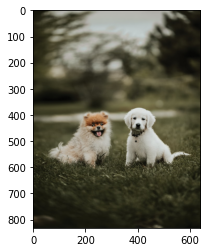

photos/1VgfQdCuX-4.jpg


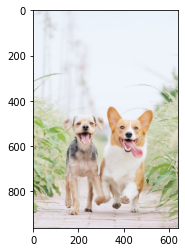

photos/2ixYuIJ83U4.jpg


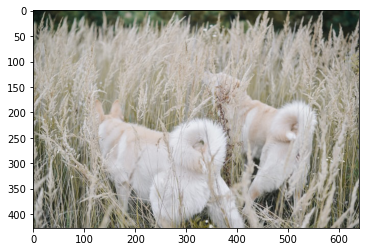

In [27]:
search('dogs in park')

[{'corpus_id': 954, 'score': 0.29623281955718994}, {'corpus_id': 4555, 'score': 0.2855904996395111}, {'corpus_id': 1676, 'score': 0.285590261220932}]
Query:  sunset
photos/UXV9W9QzCDE.jpg


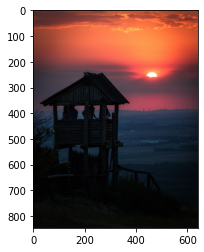

photos/EhvMzMRO4_o.jpg


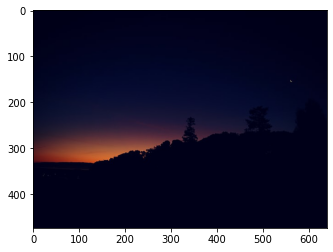

photos/Dk9tjsGL48s.jpg


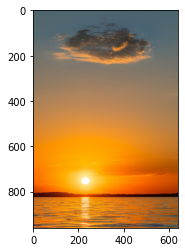

In [30]:
search('sunset')

[{'corpus_id': 63, 'score': 0.30519938468933105}, {'corpus_id': 169, 'score': 0.2958964407444}, {'corpus_id': 1410, 'score': 0.29585957527160645}]
Query:  snowfall in canada
photos/uDUgua2extA.jpg


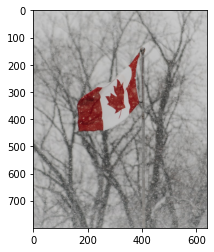

photos/Auewhfdwzj4.jpg


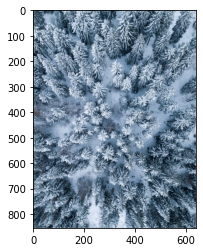

photos/t3nS2c_HRrM.jpg


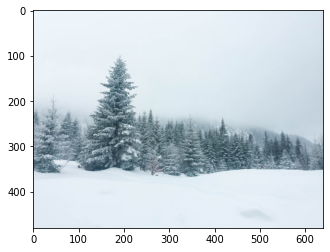

In [31]:
search('snowfall in canada')

[{'corpus_id': 3688, 'score': 0.30741482973098755}, {'corpus_id': 1520, 'score': 0.28658780455589294}, {'corpus_id': 3284, 'score': 0.27346697449684143}]
Query:  two cats
photos/w6tMRf7kGLA.jpg


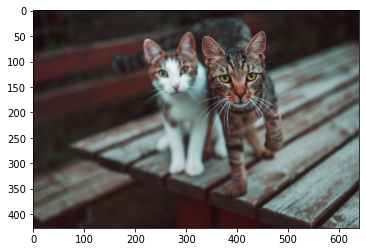

photos/gAPXLS1LRVE.jpg


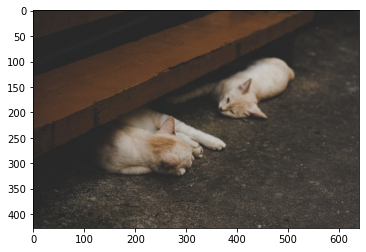

photos/Fst4SmneRU4.jpg


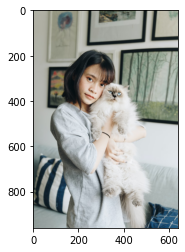

In [35]:
search('two cats')

#Finding images based of the image present in the sample dataset:-

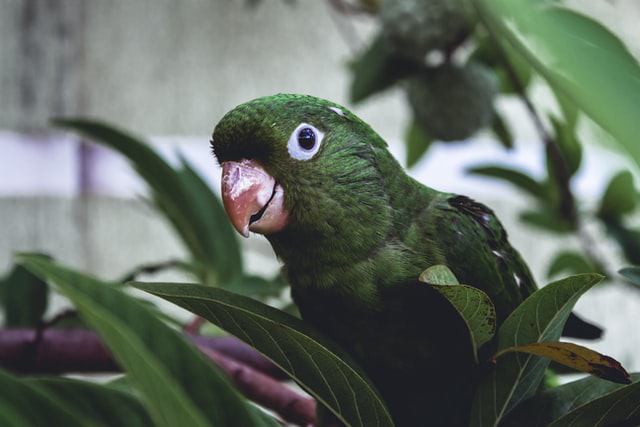

In [39]:
#img_names[121]
Image.open(img_names[121]) #opening image 121 from the sample dataset.

[{'corpus_id': 121, 'score': 0.9999999403953552}, {'corpus_id': 2089, 'score': 0.872739315032959}, {'corpus_id': 835, 'score': 0.872574508190155}]
Query:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x427 at 0x7F964C398FD0>
photos/M0_yupMxTzg.jpg


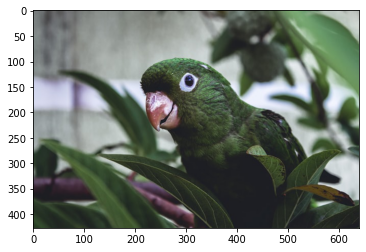

photos/K7pW4OqWepc.jpg


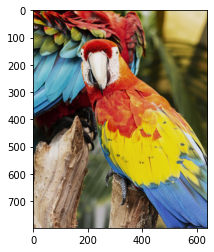

photos/mLy03-Xp178.jpg


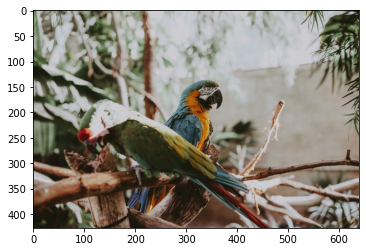

In [41]:
search(Image.open(img_names[121])) #searching images related to the image 121. 